# Flight Status Predictor

## Executive Summary

This project is an educational initiative designed to familiarize us with the Machine Learning (ML) Pipeline. While our primary goal is to develop an ML model that predicts significant flight delays, it's important to note that we're focusing on the learning process rather than creating the most robust model possible. The project aims to build a tool that can forecast whether the arrival time of the flight will be delayed by more than 15 minutes. Users input specific details about their flight, and our model provides a straightforward yes or no prediction. This approach allows us to explore and understand each stage of the ML pipeline, from data preparation and feature selection to model training and evaluation.

At the heart of this project is a comprehensive dataset comprising **over 6.7 million flights from April 2023 to March 2024**. This meticulously cleaned and prepared data not only powers our predictive model but also serves as a valuable resource for exploratory data analysis (EDA) and further machine learning applications in the aviation domain.

The project is designed to empower travelers, airlines, and analysts alike. By transforming raw flight data into actionable insights, we're working to enhance travel planning, improve airline operations, and deepen our understanding of air travel patterns. This project bridges the gap between big data and practical applications, ultimately aiming to make air travel more predictable and less stressful for everyone involved.

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if the arrival time of that flight will be delayed more than fifteen minutes or not. 

**Answer these questions about the data:**
- What variables contribute to a flight being delayed or not upon arrival?
- Which model best represents the data?
- What kind of model will we create? 

---

In [4]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from joblib import dump
%matplotlib inline

In [5]:
# Store CSV file in variable 
flights = r'..\data\DF_from_Feature_Sel_for_Model_Sel.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(flights)

In [6]:
# Print dataframe to confirm successful loading
df

,Carrier_Name,Week_Day,Flight_Date,Flight_Number,Origin_City_State,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Scheduled_Gate_to_Gate_Time,Distance_Miles,Distance_Group,delayed
0,United Air Lines Inc.,Tuesday,2023-09-05,773,"Denver, CO","Nashville, TN",Afternoon,1743,2119,156,1014,5,0
1,Delta Air Lines Inc.,Friday,2024-03-29,2641,"Salt Lake City, UT","Seattle, WA",Afternoon,1710,1823,133,689,3,0
2,American Airlines Inc.,Sunday,2023-06-04,2677,"Orlando, FL","Dallas/Fort Worth, TX",Early Morning,550,745,175,985,4,0
3,Delta Air Lines Inc.,Friday,2023-08-04,1451,"Jacksonville, FL","Boston, MA",Early Afternoon,1215,1459,164,1010,5,1
4,Southwest Airlines Co.,Tuesday,2023-04-18,185,"Dallas, TX","Indianapolis, IN",Evening,1955,2255,120,755,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Thursday,2023-10-26,4815,"Dallas/Fort Worth, TX","Killeen, TX",Morning,1044,1202,78,134,1,1
2742898,Southwest Airlines Co.,Thursday,2023-07-20,4277,"Las Vegas, NV","El Paso, TX",Afternoon,1620,1905,105,583,3,1
2742899,Endeavor Air Inc.,Saturday,2024-01-27,4915,"Des Moines, IA","New York, NY",Early Afternoon,1300,1644,164,1031,5,0
2742900,Southwest Airlines Co.,Thursday,2023-07-20,1817,"Phoenix, AZ","St. Louis, MO",Evening,2015,115,180,1262,6,1


# Data Preprocessing (Data Cleaning and Preparation)

I'm tackling the critical task of data preprocessing. My goal is to transform millions of raw flight records into a clean, analysis-ready dataset. I'm carefully cleaning and structuring the downsampled data from **over 2.7 million** flights, selecting the most relevant features, and ensuring the information is in the best format for our machine learning model. This process not only sets the stage for accurate delay predictions but also creates a valuable resource for broader aviation insights. By focusing on data quality and accessibility, I'm laying the groundwork for both our immediate project goals and future exploratory analyses in the fascinating world of air travel.

<span style="color:red">**NOTE**</span>: This step was mostly taken care of during EDA, Feature Selection and Model Selection, but wanted to still view the data and make any necessary adjustments

In [9]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group',
       'delayed'],
      dtype='object')

### Check For Correct Dtypes

Checking for correct data types (dtypes) is crucial in data preprocessing as it ensures data integrity and optimizes performance. Proper dtypes facilitate accurate calculations, enable efficient storage, and allow for seamless functionality with data analysis libraries. Moreover, correct dtypes improve machine learning model accuracy and enable more effective feature engineering, which is essential for our flight delay prediction project.

In [11]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 13 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Carrier_Name                 object
 1   Week_Day                     object
 2   Flight_Date                  object
 3   Flight_Number                int64 
 4   Origin_City_State            object
 5   Destination_City_State       object
 6   Dep_Time_Block_Group         object
 7   Scheduled_Departure_Time     int64 
 8   Scheduled_Arrival_Time       int64 
 9   Scheduled_Gate_to_Gate_Time  int64 
 10  Distance_Miles               int64 
 11  Distance_Group               int64 
 12  delayed                      int64 
dtypes: int64(7), object(6)
memory usage: 272.0+ MB


Columns that need to be converted to Object dtype: 
- Flight_Number

Holding off on converting since some columns will not be needed for analysis

### NULL and Duplicate Values

Checking for **null** records is crucial as they can skew analyses and cause errors in our flight delay prediction model, requiring appropriate handling through imputation or removal. Identifying and addressing **duplicate** records prevents data inflation and bias, ensuring each flight is represented accurately without undue influence on our predictions. These checks are fundamental to maintaining data integrity and building a reliable model, especially given our large downsampled dataset of **2.7+ million** flight records.

In [15]:
# Check for missing values 
print(df.isnull().sum())

Carrier_Name                   0
Week_Day                       0
Flight_Date                    0
Flight_Number                  0
Origin_City_State              0
Destination_City_State         0
Dep_Time_Block_Group           0
Scheduled_Departure_Time       0
Scheduled_Arrival_Time         0
Scheduled_Gate_to_Gate_Time    0
Distance_Miles                 0
Distance_Group                 0
delayed                        0
dtype: int64


In [16]:
# Check for duplicate entries
df[df.duplicated()]

,Carrier_Name,Week_Day,Flight_Date,Flight_Number,Origin_City_State,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Scheduled_Gate_to_Gate_Time,Distance_Miles,Distance_Group,delayed


As stated before during EDA and Feature Selection, there doesn't appear to be any duplicated rows

Remember, during EDA, we already renamed the target variable column **Arr_Delay_At_Least_15_Minutes** to **delayed**

In [19]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group',
       'delayed'],
      dtype='object')

---

# Feature Selection

Based off the information gathered in Feature Selection using the Phik Coreelation Matrix, the following features will be used for model selection: 

> Categorical Variables:
> - Carrier_Name
> - Dep_Time_Block_Group
> - Flight_Date (Month) - Will need to convert this to actual month (Jan, Feb, Mar, etc.) to avoid ordinality with numbers
>
> Numeric Variables:
> - Scheduled_Arrival_Time
> - Scheduled_Departure_Time
> - Flight_Date (Year)
> - Flight_Date (Day)
> - delayed (target variable)

In [22]:
# Add highly correlated features into a new dataframe 
df_features = pd.DataFrame(data=df[['Carrier_Name', 'Flight_Date', 'Dep_Time_Block_Group', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'delayed']])
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1
...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1


In [23]:
# Convert 'Flight_Date' to datetime objects
df_features['Flight_Date'] = pd.to_datetime(df_features['Flight_Date'])

# Extract month and year
df_features['Month'] = df_features['Flight_Date'].dt.month
df_features['Year'] = df_features['Flight_Date'].dt.year
df_features['Day'] = df_features['Flight_Date'].dt.day

In [24]:
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0,9,2023,5
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0,3,2024,29
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0,6,2023,4
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1,8,2023,4
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1,4,2023,18
...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1,10,2023,26
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1,7,2023,20
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0,1,2024,27
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1,7,2023,20


In [25]:
# Convert Month to actual month (Jan, Feb, Mar, etc.)
df_features['Month'] = pd.to_datetime(df_features['Month'], format="%m").dt.strftime("%b")

In [26]:
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0,Sep,2023,5
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0,Mar,2024,29
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0,Jun,2023,4
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1,Aug,2023,4
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1,Apr,2023,18
...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1,Oct,2023,26
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1,Jul,2023,20
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0,Jan,2024,27
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1,Jul,2023,20


In [27]:
# Drop unnecessary columns from new dataframe 
df_features.drop(['Flight_Date'], axis=1, inplace=True)

In [28]:
df_features

,Carrier_Name,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,Afternoon,2119,1743,0,Sep,2023,5
1,Delta Air Lines Inc.,Afternoon,1823,1710,0,Mar,2024,29
2,American Airlines Inc.,Early Morning,745,550,0,Jun,2023,4
3,Delta Air Lines Inc.,Early Afternoon,1459,1215,1,Aug,2023,4
4,Southwest Airlines Co.,Evening,2255,1955,1,Apr,2023,18
...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Morning,1202,1044,1,Oct,2023,26
2742898,Southwest Airlines Co.,Afternoon,1905,1620,1,Jul,2023,20
2742899,Endeavor Air Inc.,Early Afternoon,1644,1300,0,Jan,2024,27
2742900,Southwest Airlines Co.,Evening,115,2015,1,Jul,2023,20


In [29]:
# Check for missing values 
print(df_features.isnull().sum())

Carrier_Name                0
Dep_Time_Block_Group        0
Scheduled_Arrival_Time      0
Scheduled_Departure_Time    0
delayed                     0
Month                       0
Year                        0
Day                         0
dtype: int64


In [30]:
# Grouping numerical columns and
# Moving the target variable to be the right-most column

# Columns to move
cols_to_move = [
                'Carrier_Name',
                'Dep_Time_Block_Group',
                'Month',
                'Year',
                'Day',
                'Scheduled_Arrival_Time', 
                'Scheduled_Departure_Time'
                ]

last_col = 'delayed'

# Extracting the columns to move
columns_to_move = df_features[cols_to_move]

# Dropping these columns from the DataFrame
df_features.drop(columns=cols_to_move, inplace=True)

# Extracting the last column
last_column = df_features.pop(last_col)

# Reinserting the numerical columns
df_features = pd.concat([df_features, columns_to_move], axis=1)

# Reinserting the last column
df_features[last_col] = last_column

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 8 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Carrier_Name              object
 1   Dep_Time_Block_Group      object
 2   Month                     object
 3   Year                      int32 
 4   Day                       int32 
 5   Scheduled_Arrival_Time    int64 
 6   Scheduled_Departure_Time  int64 
 7   delayed                   int64 
dtypes: int32(2), int64(3), object(3)
memory usage: 146.5+ MB


In [31]:
# Define categorical and numerical features
categorical_features = ['Carrier_Name', 'Dep_Time_Block_Group', 'Month']
numerical_features = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Year', 'Day']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
X = df_features[['Carrier_Name', 'Year', 'Month', 'Day', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 
                'Dep_Time_Block_Group']]
y = df_features["delayed"]

# Apply the preprocessing pipeline to X
x_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2194321, 37)
x_test shape: (548581, 37)
y_train shape: (2194321,)
y_test shape: (548581,)


---

# Model Creation: Logistic Regression

I've chosen logistic regression as the modeling technique as I decided to only work with one model. It's a great fit for what we're trying to achieve - predicting a simple yes or no outcome for flight delays.

Logistic regression excels at binary classification, which aligns perfectly with our goal of predicting whether the arrival time of the flight will be delayed by more than 15 minutes. It works by estimating probabilities, giving us insights into how likely a delay is based on various flight characteristics. I appreciate its interpretability - we can easily understand which factors are most influential in causing delays.

While it may not be the most complex algorithm out there, logistic regression provides us with a solid foundation for learning the ML pipeline. It allows us to transform our carefully preprocessed downsampled dataset of **2.7+ million** flights into meaningful predictions, balancing simplicity with effectiveness. This approach lets us focus on the learning process while still creating a useful tool for understanding flight delays.

In [34]:
# Logistic regression model
logreg = LogisticRegression(random_state=42)

# Train and evaluate the model
logreg.fit(X_train, y_train)
# Predictions on test data
y_pred = logreg.predict(X_test)

## Initial Model Performance

In [36]:
# Calculate confusion matrix
cm_init = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision_init, recall_init, _ = precision_recall_curve(y_test, y_pred)

# Calculate ROC curve
fpr_init, tpr_init, _ = roc_curve(y_test, y_pred)

# Calculate ROC AUC score
roc_auc_init = roc_auc_score(y_test, y_pred)

# Calculate evaluation metrics
accuracy_init = accuracy_score(y_test, y_pred)
f1_init= f1_score(y_test, y_pred)

Confusion Matrix:
 [[164918 109501]
 [ 99262 174900]]

True Positives(TP) =  164918

True Negatives(TN) =  174900

False Positives(FP) =  109501

False Negatives(FN) =  99262

Accuracy: 0.6194490877372713
F1 Score: 0.6262498590132178
ROC AUC Score: 0.6194577481975653
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61    274419
           1       0.61      0.64      0.63    274162

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581



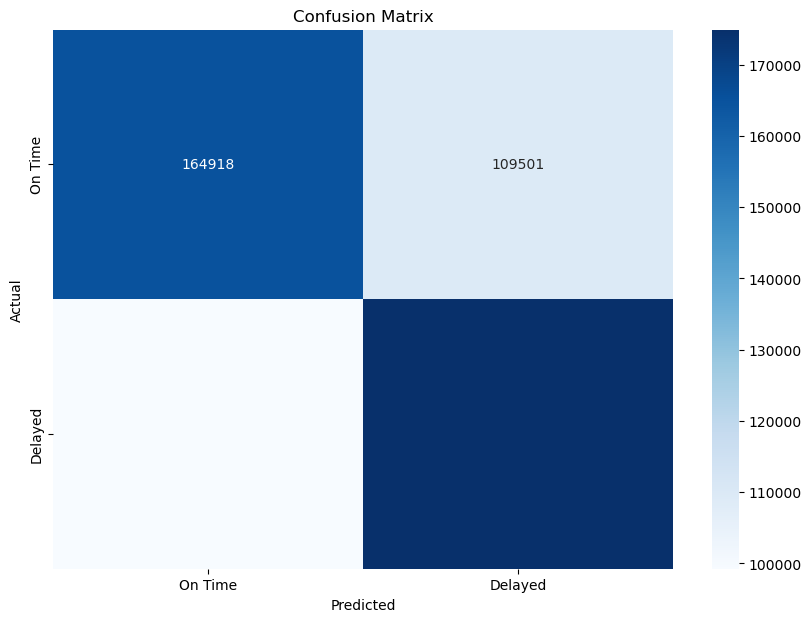

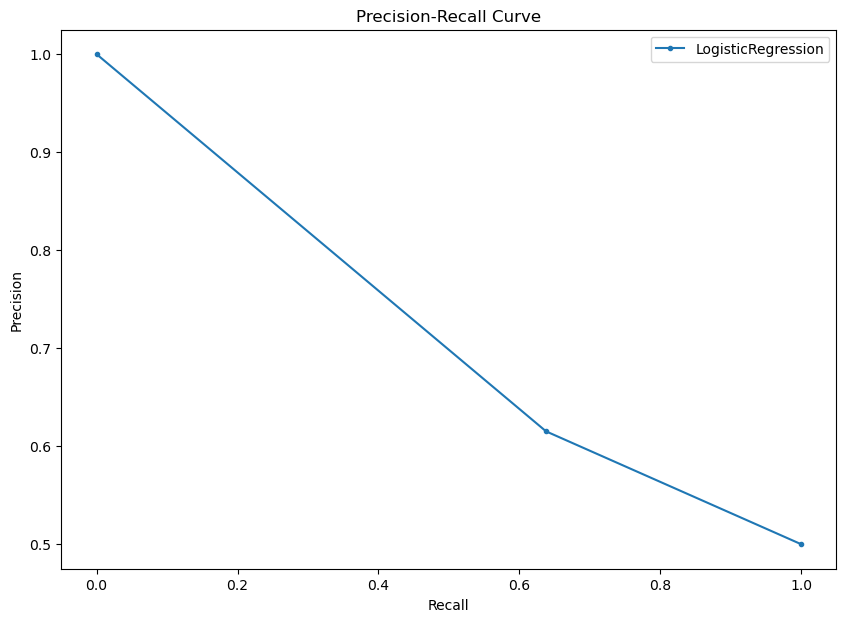

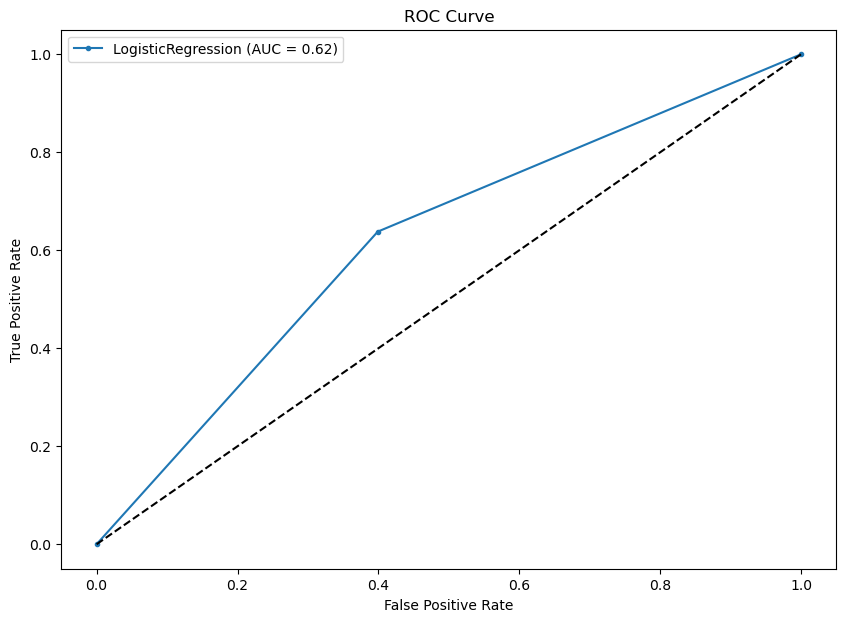

In [37]:
# Display metrics
print("Confusion Matrix:\n", cm_init)
print('\nTrue Positives(TP) = ', cm_init[0,0])
print('\nTrue Negatives(TN) = ', cm_init[1,1])
print('\nFalse Positives(FP) = ', cm_init[0,1])
print('\nFalse Negatives(FN) = ', cm_init[1,0])
print("\nAccuracy:", accuracy_init)
print("F1 Score:", f1_init)
print("ROC AUC Score:", roc_auc_init)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_init, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_init, precision_init, marker='.', label='LogisticRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_init, tpr_init, marker='.', label='LogisticRegression (AUC = %0.2f)' % roc_auc_init)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Key Observations**
- The model has an accuracy of **61.94%**, meaning it correctly classifies approximately **62%** of the instances
- The F1 score, which balances precision and recall, is approximately **62.62%**, indicating a moderate performance
- The ROC AUC score is about **61.95%**, suggesting that the model is somewhat capable of distinguishing between the two classes, but there's room for improvement
- The classification report indicates similar performance for both classes, with precision, recall, and F1 scores around **60-64%**

Overall, while the model shows some ability to classify the data, its performance metrics suggest that there is considerable room for improvement

## K-Fold Cross Validation

I am using K-Fold Cross-Validation to thoroughly evaluate my logistic regression model's performance. This technique involves dividing our downsampled dataset of **2.7+ million** flights into 'k' subsets, training and validating the model multiple times to get a robust performance estimate. By doing so, we aim to ensure our model generalizes well to unseen data and isn't overfitting. This approach aligns with our goal of learning the ML pipeline process, helping us build a reliable model without focusing solely on achieving the highest possible accuracy.

This will ensure we did not get lucky with the test set, relieving of any bias in the data as it performs many iterations of the training set

In [42]:
# Defining k-Folds Cross Validation parameters
accuracies = cross_val_score(estimator = logreg,
                    X = x_preprocessed,
                    y = y,
                    scoring = 'accuracy',
                    cv = 10)

print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f}".format(accuracies.std()))

Accuracy: 62.014 %
Standard Deviation: 0.000


**Accuracy**: The accuracy **62.014%** suggests that the model is correctly predicting the target variable approximately **62.0%** of the time. This accuracy will serve as a baseline to gauge improvement after hyperparameter tuning 

**Standard Deviation**: The standard deviation of **0.000 (or 0%)** indicates that the accuracy across different folds is consistent, suggesting that the model's performance is stable across the dataset split

## Hyperparameter Tuning

Hyperparameter tuning is a key step in optimizing the flight delay prediction model. I am systematically adjusting settings like regularization strength and solver type in our logistic regression algorithm to find the best combination for accurate predictions. This process helps balance the model's fit to our training data with its ability to generalize to new flights. By fine-tuning these parameters, I am not only improving accuracy but also gaining insights into how different settings affect performance. This aligns with our goal of understanding the ML pipeline while creating an efficient prediction tool.

In [45]:
# Define the parameter grid for hyperparameter tuning

# Valid parameters for logistic regression: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio',
#                                            'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 
#                                            'tol', 'verbose', 'warm_start'].
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]  # Increase max_iter for 'lbfgs'
}
# Perform hyperparameter tuning using GridSearchCV
lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model
best_lr = grid_search.best_estimator_

# Print the best hyperparameters
print(grid_search.best_params_)

# Evaluate the best model
y_pred = best_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of best model:')
print(cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'C': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix of best model:
[[164601 109818]
 [ 98999 175163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61    274419
           1       0.61      0.64      0.63    274162

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581



## Model Optimization

Model optimization involves refining our logistic regression model through feature selection and hyperparameter tuning to improve its performance and generalizability.

In [47]:
# Initialize a logistic regression model with the best hyperparameters
best_params = {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
best_model = LogisticRegression(**best_params)

# Train the optimized model on the training data
best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

### Model Evaluation

For model evaluation, I am using metrics like accuracy, precision, recall, and F1-score, along with a confusion matrix, to assess how well our model predicts delays across our downsampled dataset of **2.7+ million** flights. These processes help to understand the model's capabilities and limitations, aligning with our goal of learning the ML pipeline while creating a reliable prediction tool.

In [49]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate classification report and confusion matrix (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.619445441967549
Precision: 0.6149780758046197
Recall: 0.6379184569706962
F1-score: 0.6262382486111384

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61    274419
           1       0.61      0.64      0.63    274162

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581


Confusion Matrix:
[[164923 109496]
 [ 99269 174893]]


---

In [51]:
# Define categorical and numerical features
categorical_features = ['Carrier_Name', 'Dep_Time_Block_Group', 'Month']
numerical_features = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Year', 'Day']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
X = df_features[['Carrier_Name', 'Year', 'Month', 'Day', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 
                'Dep_Time_Block_Group']]
y = df_features["delayed"]

# Apply the preprocessing pipeline to X
x_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2194321, 37)
x_test shape: (548581, 37)
y_train shape: (2194321,)
y_test shape: (548581,)


# Best Model Creation: CatBoost

Now that we are familiar with how modelling works, let us now create a model using the best model we found in model selection. 

In [53]:
# CatBoost model
catboost = CatBoostClassifier(random_state=42)

# Train and evaluate the model
catboost.fit(X_train, y_train)
# Predictions on test data
y_pred = catboost.predict(X_test)

Learning rate set to 0.275213
0:	learn: 0.6786821	total: 256ms	remaining: 4m 15s
1:	learn: 0.6701091	total: 347ms	remaining: 2m 53s
2:	learn: 0.6647137	total: 435ms	remaining: 2m 24s
3:	learn: 0.6605851	total: 528ms	remaining: 2m 11s
4:	learn: 0.6575596	total: 618ms	remaining: 2m 2s
5:	learn: 0.6552271	total: 705ms	remaining: 1m 56s
6:	learn: 0.6531311	total: 791ms	remaining: 1m 52s
7:	learn: 0.6518277	total: 887ms	remaining: 1m 50s
8:	learn: 0.6504909	total: 975ms	remaining: 1m 47s
9:	learn: 0.6494739	total: 1.06s	remaining: 1m 45s
10:	learn: 0.6483418	total: 1.15s	remaining: 1m 43s
11:	learn: 0.6475191	total: 1.24s	remaining: 1m 42s
12:	learn: 0.6468844	total: 1.34s	remaining: 1m 41s
13:	learn: 0.6463239	total: 1.44s	remaining: 1m 41s
14:	learn: 0.6456948	total: 1.54s	remaining: 1m 41s
15:	learn: 0.6449822	total: 1.65s	remaining: 1m 41s
16:	learn: 0.6445824	total: 1.74s	remaining: 1m 40s
17:	learn: 0.6439762	total: 1.85s	remaining: 1m 41s
18:	learn: 0.6435794	total: 1.97s	remaining: 

## Initial Model Performance

In [55]:
# Calculate confusion matrix
cm_init = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision_init, recall_init, _ = precision_recall_curve(y_test, y_pred)

# Calculate ROC curve
fpr_init, tpr_init, _ = roc_curve(y_test, y_pred)

# Calculate ROC AUC score
roc_auc_init = roc_auc_score(y_test, y_pred)

# Calculate evaluation metrics
accuracy_init = accuracy_score(y_test, y_pred)
f1_init= f1_score(y_test, y_pred)

Confusion Matrix:
 [[185222  89197]
 [ 98324 175838]]

True Positives(TP) =  185222

True Negatives(TN) =  175838

False Positives(FP) =  89197

False Negatives(FN) =  98324

Accuracy: 0.658170807957257
F1 Score: 0.6522217297203063
ROC AUC Score: 0.6581629385871732
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66    274419
           1       0.66      0.64      0.65    274162

    accuracy                           0.66    548581
   macro avg       0.66      0.66      0.66    548581
weighted avg       0.66      0.66      0.66    548581



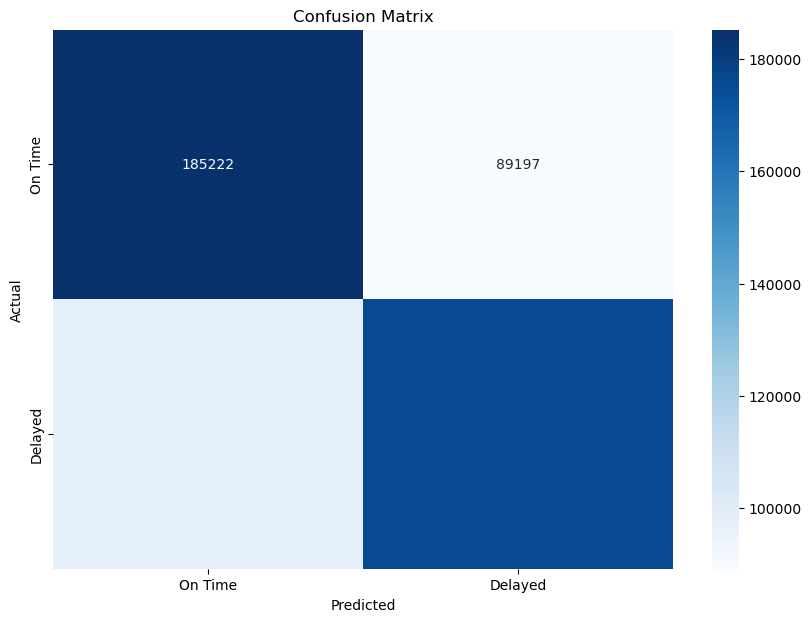

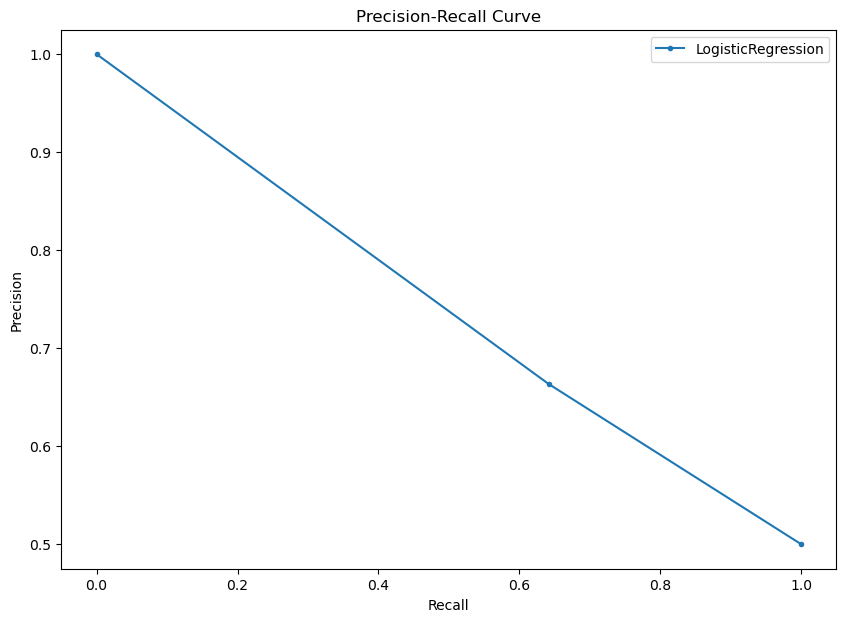

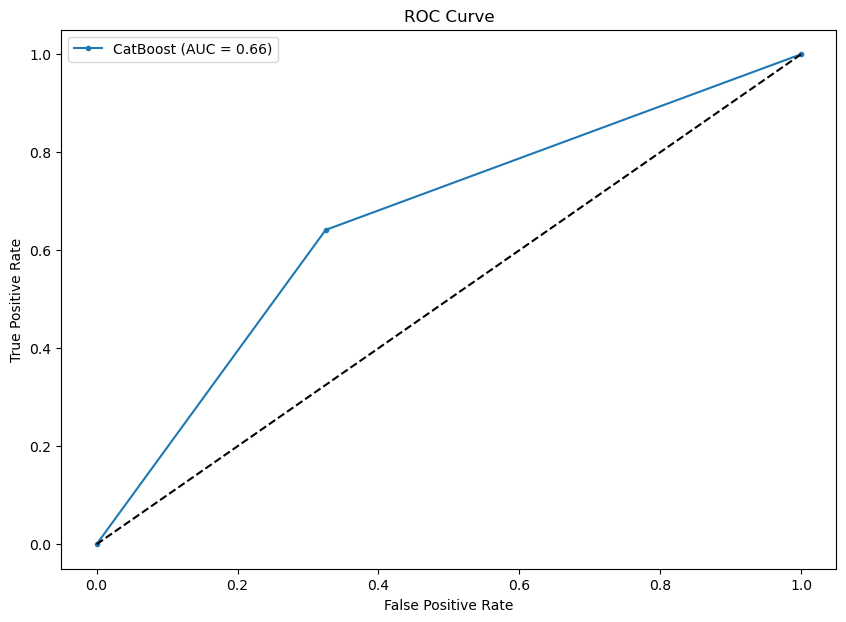

In [56]:
# Display metrics
print("Confusion Matrix:\n", cm_init)
print('\nTrue Positives(TP) = ', cm_init[0,0])
print('\nTrue Negatives(TN) = ', cm_init[1,1])
print('\nFalse Positives(FP) = ', cm_init[0,1])
print('\nFalse Negatives(FN) = ', cm_init[1,0])
print("\nAccuracy:", accuracy_init)
print("F1 Score:", f1_init)
print("ROC AUC Score:", roc_auc_init)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_init, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_init, precision_init, marker='.', label='LogisticRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_init, tpr_init, marker='.', label='CatBoost (AUC = %0.2f)' % roc_auc_init)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Key Observations**
- The model has an accuracy of **65.82%**, meaning it correctly classifies approximately **66%** of the instances
- The F1 score, which balances precision and recall, is approximately **65.22%**, indicating a moderate performance
- The ROC AUC score is about **65.82%**, suggesting that the model is somewhat capable of distinguishing between the two classes, but there's room for improvement
- The classification report indicates similar performance for both classes, with precision, recall, and F1 scores around **64-67%**

Overall, while the model shows some ability to classify the data, its performance metrics suggest that there is considerable room for improvement

## K-Fold Cross Validation

In [60]:
# Defining k-Folds Cross Validation parameters
accuracies = cross_val_score(estimator = catboost,
                    X = x_preprocessed,
                    y = y,
                    scoring = 'accuracy',
                    cv = 10)

print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f}".format(accuracies.std()))

Learning rate set to 0.289409
0:	learn: 0.6779574	total: 112ms	remaining: 1m 51s
1:	learn: 0.6693520	total: 220ms	remaining: 1m 49s
2:	learn: 0.6637164	total: 331ms	remaining: 1m 49s
3:	learn: 0.6597890	total: 444ms	remaining: 1m 50s
4:	learn: 0.6567841	total: 561ms	remaining: 1m 51s
5:	learn: 0.6547454	total: 673ms	remaining: 1m 51s
6:	learn: 0.6529902	total: 783ms	remaining: 1m 51s
7:	learn: 0.6514197	total: 889ms	remaining: 1m 50s
8:	learn: 0.6497752	total: 1.01s	remaining: 1m 51s
9:	learn: 0.6487510	total: 1.12s	remaining: 1m 50s
10:	learn: 0.6477354	total: 1.23s	remaining: 1m 50s
11:	learn: 0.6465905	total: 1.35s	remaining: 1m 51s
12:	learn: 0.6458484	total: 1.45s	remaining: 1m 50s
13:	learn: 0.6450529	total: 1.56s	remaining: 1m 50s
14:	learn: 0.6445033	total: 1.68s	remaining: 1m 50s
15:	learn: 0.6439536	total: 1.8s	remaining: 1m 50s
16:	learn: 0.6434388	total: 1.93s	remaining: 1m 51s
17:	learn: 0.6427988	total: 2.04s	remaining: 1m 51s
18:	learn: 0.6424344	total: 2.16s	remaining: 

**Accuracy**: The accuracy **65.885%** suggests that the model is correctly predicting the target variable approximately **66.0%** of the time. This accuracy will serve as a baseline to gauge improvement after hyperparameter tuning 

**Standard Deviation**: The standard deviation of **0.001 (or 0%)** indicates that the accuracy across different folds is consistent, suggesting that the model's performance is stable across the dataset split

## Hyperparameter Tuning

In [63]:
# Define the parameter grid for hyperparameter tuning

# Valid parameters for CatBoost: ['depth', 'learning_rate', 'iterations', '12_leaf_reg', 'loss_function', 
#                                 'border_count', 'ctr_border_count', 'bagging_temperature', 'sampling_frequency', 
#                                 'leaf_estimation_method', 'random_strength', 'boosting_type', 'feature_border_type', 
#                                 'max_ctr_complexity', 'fold_len_multiplier'].
param_grid = {
    'depth': [4,5,6,7,8,9,10],
    'learning_rate': [0.01,0.02,0.03,0.04],
    'iterations': [10, 20,30,40,50,60,70,80,90,100], 
    'l2_leaf_reg':[3,1,5,10,100],
}
# Perform hyperparameter tuning using GridSearchCV
cb = CatBoostClassifier(random_state=42)
grid_search = GridSearchCV(estimator=cb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model
best_cb = grid_search.best_estimator_

# Print the best hyperparameters
print(grid_search.best_params_)

# Evaluate the best model
y_pred = best_cb.predict(X_test)
classReport = classification_report(y_test, y_pred)
print("Classification Report:\n", classReport)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
0:	learn: 0.6901951	total: 170ms	remaining: 16.8s
1:	learn: 0.6874937	total: 351ms	remaining: 17.2s
2:	learn: 0.6850090	total: 521ms	remaining: 16.8s
3:	learn: 0.6826660	total: 689ms	remaining: 16.5s
4:	learn: 0.6804233	total: 850ms	remaining: 16.1s
5:	learn: 0.6784619	total: 1.04s	remaining: 16.2s
6:	learn: 0.6765588	total: 1.22s	remaining: 16.2s
7:	learn: 0.6748391	total: 1.39s	remaining: 16s
8:	learn: 0.6731654	total: 1.56s	remaining: 15.8s
9:	learn: 0.6715839	total: 1.73s	remaining: 15.5s
10:	learn: 0.6701075	total: 1.9s	remaining: 15.4s
11:	learn: 0.6687170	total: 2.08s	remaining: 15.3s
12:	learn: 0.6674184	total: 2.27s	remaining: 15.2s
13:	learn: 0.6662103	total: 2.43s	remaining: 14.9s
14:	learn: 0.6651316	total: 2.6s	remaining: 14.7s
15:	learn: 0.6640650	total: 2.77s	remaining: 14.5s
16:	learn: 0.6629964	total: 2.93s	remaining: 14.3s
17:	learn: 0.6620860	total: 3.09s	remaining: 14.1s
18:	learn: 0.6611601	total: 3.2

In [64]:
# Identify the most important features
feature_importances = best_cb.feature_importances_
features = X.columns
#importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
#importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
#print(importance_df)
print(feature_importances)
print(features)

[ 8.39612774 15.62457385  0.55315071 13.16558044  0.          0.1167901
  1.85227831  3.75629793  1.37960049  0.07051799  2.16089606  0.46842905
  3.92845228  0.03448626  3.23643482  3.23402281  4.53257581  2.43386459
  0.31080564  0.          0.29565561  0.67591193  0.17079175  0.13134548
  0.          2.3456359   1.70149625  2.40982143  1.85106192  5.86786439
  6.63651011  5.21345721  0.48694758  0.71920123  3.81178996  2.06436544
  0.36325891]
Index(['Carrier_Name', 'Year', 'Month', 'Day', 'Scheduled_Arrival_Time',
       'Scheduled_Departure_Time', 'Dep_Time_Block_Group'],
      dtype='object')


## Model Optimization

In [106]:
# Initialize a logistic regression model with the best hyperparameters
best_params = {'depth': 10, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.04}
best_model = CatBoostClassifier(**best_params)

# Train the optimized model on the training data
best_model.fit(X_train, y_train)

0:	learn: 0.6902815	total: 149ms	remaining: 14.8s
1:	learn: 0.6875123	total: 296ms	remaining: 14.5s
2:	learn: 0.6850476	total: 436ms	remaining: 14.1s
3:	learn: 0.6826409	total: 585ms	remaining: 14.1s
4:	learn: 0.6804627	total: 730ms	remaining: 13.9s
5:	learn: 0.6784164	total: 871ms	remaining: 13.7s
6:	learn: 0.6765474	total: 1.01s	remaining: 13.4s
7:	learn: 0.6747613	total: 1.17s	remaining: 13.5s
8:	learn: 0.6731034	total: 1.33s	remaining: 13.4s
9:	learn: 0.6715761	total: 1.48s	remaining: 13.3s
10:	learn: 0.6700957	total: 1.63s	remaining: 13.2s
11:	learn: 0.6687249	total: 1.78s	remaining: 13.1s
12:	learn: 0.6674121	total: 1.92s	remaining: 12.9s
13:	learn: 0.6661480	total: 2.08s	remaining: 12.7s
14:	learn: 0.6650195	total: 2.22s	remaining: 12.6s
15:	learn: 0.6639360	total: 2.38s	remaining: 12.5s
16:	learn: 0.6628993	total: 2.53s	remaining: 12.3s
17:	learn: 0.6619408	total: 2.67s	remaining: 12.2s
18:	learn: 0.6610062	total: 2.82s	remaining: 12s
19:	learn: 0.6601415	total: 2.98s	remaining

## Model Evaluation

In [108]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

# Generate classification report and confusion matrix (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6356654714618261
Precision: 0.637907671746515
Recall: 0.6267462303309722
F1-score: 0.632277697336103
ROC-AUC: 0.6356612949198035

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.64    274419
           1       0.64      0.63      0.63    274162

    accuracy                           0.64    548581
   macro avg       0.64      0.64      0.64    548581
weighted avg       0.64      0.64      0.64    548581


Confusion Matrix:
[[176884  97535]
 [102332 171830]]


## Conclusion

Even though initial model performance was **65.22%** F1 score and **65.82%** ROC-AUC score, the performance went down to **63%** after training the model with the best parameters